<a href="https://colab.research.google.com/github/krishna7745/tensorFlow-prac/blob/main/tf_prac_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import numpy as np
from keras.utils.np_utils import to_categorical
from keras.datasets import reuters
from keras import models
from keras import layers

import copy
import matplotlib.pyplot as plt
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [ ]:
word_index =reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train= vectorize_sequences(train_data)
x_test= vectorize_sequences(test_data)
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(200, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=2,
                    batch_size=16,
                    validation_data=(x_val, y_val))

Epoch 1/2
499/499 [==============================] - 10s 21ms/step - loss: 1.2231 - accuracy: 0.7313 - val_loss: 0.9218 - val_accuracy: 0.8170
Epoch 2/2
499/499 [==============================] - 10s 20ms/step - loss: 0.5971 - accuracy: 0.8702 - val_loss: 0.8370 - val_accuracy: 0.8340


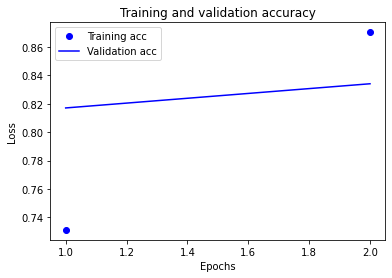

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 5ms/step - loss: 0.9713 - accuracy: 0.7992


In [ ]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18521816562778273

In [ ]:

predictions = model.predict(x_test)